# Лабораторная работа №3

## Тема работы: «Решение задачи классификации»

## Цели работы

- исследование процесса решения задачи классификации
- изучение библиотек *Python*: *scikit-learn* и *Pandas*

## Пояснения к работе

## Ход работы

В своей рабочей папке открыть командное окно и запустить jupyter командой
```bash
> jupyter notebook
```
Создать новый блокнот: **[New] -> [Python]**.

В новом блокноте загрузить пару необходимых библиотек:

In [1]:
import numpy as np
import pandas as pd

#### Подготовка данных
Загрузим данные из файла *csv* функцией *read_csv* библиотеки *Pandas*. 
Задача &mdash; классифицировать студентов на потребляющих и не потребляющих алкоголь. Данные взяты (и модифицированы) из репозитория [UCI ML](https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION).
Описание данных:

    school - student's school (binary: 1 - Gabriel Pereira or 0 - Mousinho da Silveira)
    sex - student's sex (binary: 0 - female or 0 - male)
    age - student's age (numeric: from 15 to 22)
    address - student's home address type (binary: 1 - urban or 0 - rural)
    famsize - family size (binary: 1 - less or equal to 3 or 0 - greater than 3)
    parents_divorced - parent's cohabitation status (binary: 0 - living together or 'A' - apart)
    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    schoolsup - extra educational support (binary: 1 or 0)
    famsup - family educational support (binary: 1 or 0)
    paid - extra paid classes within the course subject (Math or Portuguese) (binary: 1 or 0)
    activities - extra-curricular activities (binary: 1 or 0)
    nursery - attended nursery school (binary: 1 or 0)
    higher - wants to take higher education (binary: 1 or 0)
    internet - Internet access at home (binary: 1 or 0)
    romantic - with a romantic relationship (binary: 1 or 0)
    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    health - current health status (numeric: from 1 - very bad to 5 - very good)
    absences - number of school absences (numeric: from 0 to 93)
    G1, G2, G3 - grades for the first three years (numeric: between 0 and 20)
    alc - student's alcohol consumption (binary: 1 - yes, 0 - no)
    
Метод *head* получившегося фрейма (объекта класса DataFrame) выводит первые 5 строк таблицы.

In [2]:
students = pd.read_csv('datasets/student-mat.csv', sep=';')
students.head()

,school,sex,age,city,famsize,parents_divorced,Medu,Fedu,traveltime,studytime,...,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,alc
0,1,0,18,1,1,1,4,4,2,2,...,0,4,3,4,3,6,5,6,6,0
1,1,0,17,1,1,0,1,1,1,2,...,0,5,3,3,3,4,5,5,6,0
2,1,0,15,1,0,0,1,1,1,2,...,0,4,3,2,3,10,7,8,10,1
3,1,0,15,1,1,0,4,2,1,3,...,1,3,2,2,5,2,15,14,15,0
4,1,0,16,1,1,0,3,3,1,2,...,0,4,3,2,5,4,6,10,10,1


In [3]:
print("Все колонки: \n{}".format(list(students.columns)))

Все колонки: 
['school', 'sex', 'age', 'city', 'famsize', 'parents_divorced', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3', 'alc']


Целью задачи классификации в данном случае &mdash; предсказать значение колонки *alc* на основании других колонок. В примере обучение будет производиться на основе только трех колонок &mdash; оценок за первые три года *G1*, *G2*, *G3*.

Разобьем всё множество данных на тестовое и обучающее. Отведём на тестовое множество 25% всех данных.

In [4]:
SEED = 42
from sklearn.model_selection import train_test_split
train, test = train_test_split(students, test_size=0.25, random_state=SEED)

Выберем колонки, которые будут использованы для решения задачи классификации и создадим массивы, которые будут использованы для обучения.

In [5]:
cols = ['G1', 'G2', 'G3']

train_data = np.array(train[cols])
test_data  = np.array(test[cols])

train_target = np.array(train['alc'])
test_target = np.array(test['alc'])

Отразим зависимость целевого класса от переменных.

(<matplotlib.text.Text at 0xb1a6b00>, <matplotlib.text.Text at 0xba027b8>)

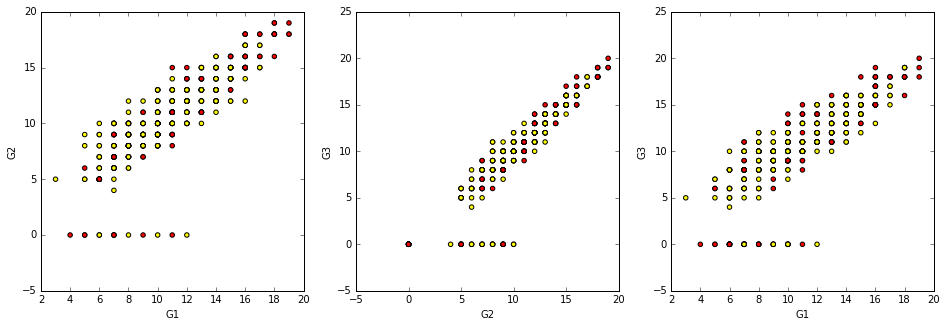

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.subplot(1, 3, 1), plt.scatter(students[cols[0]], students[cols[1]], c=students['alc'], cmap='autumn')
plt.xlabel(cols[0]), plt.ylabel(cols[1])
plt.subplot(1, 3, 2), plt.scatter(students[cols[1]], students[cols[2]], c=students['alc'], cmap='autumn')
plt.xlabel(cols[1]), plt.ylabel(cols[2])
plt.subplot(1, 3, 3), plt.scatter(students[cols[0]], students[cols[2]], c=students['alc'], cmap='autumn')
plt.xlabel(cols[0]), plt.ylabel(cols[2])

Можно заметить, что два класса сильно перемешаны, поэтому стоит использовать классификатор, хорошо работающий с нелинейными данными. Выберем дерево решений в качестве такого классификатора.

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=SEED)

Обучим модель на множестве обучающих данных.

In [8]:
clf.fit(train_data, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Проверим качество классификации на тестовом множестве.

In [9]:
prediction = clf.predict(test_data)
from sklearn.metrics import accuracy_score
score = accuracy_score(test_target, prediction)
print("Процент верно классифицированных примеров: {}".format(np.round(score * 100, 2)))

Процент верно классифицированных примеров: 50.51


Ваша задача &mdash; заметно улучшить результат. Баллы за лабораторную работу будут вычисляться как
$$
M = \left\lceil{\min\left(10, \max\left(0, \frac{correct}{all} - 58\right)\right)}\right\rceil
$$

Нельзя менять SEED и добавлять колонку *alc* в список *cols*. В любой метод необходимо добавлять параметр *random_state=SEED*.

In [10]:
print("Количество баллов = {}".format(np.ceil(np.min([10, np.max([0, score * 100 - 58])]))))

Количество баллов = 0.0
